# Data Splitting

In this tutorial, we will learn how to split data into training and test sets, perform cross-validation and bootstrapping, and use customized splits in hyperparameter optimization and model assessment. 

Let's get started!

First we will create the dataset we will be working with.

In [1]:
import os
from IPython.display import display
from qsprpred.data.data import QSPRDataset
from qsprpred.data.utils.descriptorsets import FingerprintSet
from qsprpred.data.utils.descriptorcalculator import MoleculeDescriptorsCalculator

os.makedirs("../../tutorial_output/data", exist_ok=True)

dataset = QSPRDataset.fromTableFile(
  	filename="../../tutorial_data/A2A_LIGANDS.tsv", 
  	store_dir="../../tutorial_output/data",
  	name="SplittingTutorialDataset",
  	target_props=[{"name": "pchembl_value_Mean", "task": "SINGLECLASS", "th": [6.5]}],
  	random_state=42
)

display(dataset.getDF())

desc_calc = MoleculeDescriptorsCalculator(desc_sets = [FingerprintSet(fingerprint_type="MorganFP", radius=3, nBits=2048)])
dataset.addDescriptors(desc_calc)
dataset.getDescriptors().shape

,SMILES,pchembl_value_Mean,Year,QSPRID,pchembl_value_Mean_class
QSPRID,,,,,
SplittingTutorialDataset_0,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,8.68,2008.0,SplittingTutorialDataset_0,True
SplittingTutorialDataset_1,Nc1c(C(=O)Nc2ccc([N+](=O)[O-])cc2)sc2c1cc1CCCC...,4.82,2010.0,SplittingTutorialDataset_1,False
SplittingTutorialDataset_2,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,5.65,2009.0,SplittingTutorialDataset_2,False
SplittingTutorialDataset_3,CNC(=O)C12CC1C(n1cnc3c1nc(C#CCCCCC(=O)OC)nc3NC...,5.45,2009.0,SplittingTutorialDataset_3,False
SplittingTutorialDataset_4,CCCn1c(=O)c2c(nc3cc(OC)ccn32)n(CCCNC(=O)c2ccc(...,5.20,2019.0,SplittingTutorialDataset_4,False
...,...,...,...,...,...
SplittingTutorialDataset_4077,CNc1ncc(C(=O)NCc2ccc(OC)cc2)c2nc(-c3ccco3)nn12,7.09,2018.0,SplittingTutorialDataset_4077,True
SplittingTutorialDataset_4078,Nc1nc(-c2ccco2)c2ncn(C(=O)NCCc3ccccc3)c2n1,8.22,2008.0,SplittingTutorialDataset_4078,True
SplittingTutorialDataset_4079,Nc1nc(Nc2ccc(F)cc2)nc(CSc2nnc(N)s2)n1,4.89,2010.0,SplittingTutorialDataset_4079,False


(4082, 2048)

You can see that this dataset has not been split into training and test sets yet.
All the data is in the training set.

In [3]:
def print_split(ds):
    train, test = ds.getFeatures()
    print(train.shape)
    print(test.shape)
    print(test.index)
    
print_split(dataset)

(4082, 2048)
(0, 2048)
Index([], dtype='object', name='QSPRID')


## Training and Test Split

We can use any scikit-learn splitter or an implementation  of `qsprpred.data.interfaces.DataSplit` to split the data set into training and test split:

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=dataset.randomState)
dataset.split(split)
print_split(dataset)

(3265, 2048)
(817, 2048)
Index(['SplittingTutorialDataset_1141', 'SplittingTutorialDataset_2680',
       'SplittingTutorialDataset_2238', 'SplittingTutorialDataset_2607',
       'SplittingTutorialDataset_4070', 'SplittingTutorialDataset_3630',
       'SplittingTutorialDataset_759', 'SplittingTutorialDataset_431',
       'SplittingTutorialDataset_3663', 'SplittingTutorialDataset_3301',
       ...
       'SplittingTutorialDataset_1057', 'SplittingTutorialDataset_3547',
       'SplittingTutorialDataset_424', 'SplittingTutorialDataset_26',
       'SplittingTutorialDataset_476', 'SplittingTutorialDataset_3709',
       'SplittingTutorialDataset_1470', 'SplittingTutorialDataset_2314',
       'SplittingTutorialDataset_242', 'SplittingTutorialDataset_2999'],
      dtype='object', name='QSPRID', length=817)


c:\Users\helle\anaconda3\envs\qsprpred\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Or we can use one of the build-in splits. You can find an overview of all the splits
in the [documentation](https://cddleiden.github.io/QSPRpred/docs/api/qsprpred.data.utils.html#module-qsprpred.data.utils.datasplitters).

In [5]:
from qsprpred.data.utils.datasplitters import RandomSplit

split = RandomSplit(test_fraction=0.2)
dataset.split(split)
print_split(dataset)

(3265, 2048)
(817, 2048)
Index(['SplittingTutorialDataset_599', 'SplittingTutorialDataset_752',
       'SplittingTutorialDataset_1954', 'SplittingTutorialDataset_2928',
       'SplittingTutorialDataset_2512', 'SplittingTutorialDataset_2289',
       'SplittingTutorialDataset_682', 'SplittingTutorialDataset_325',
       'SplittingTutorialDataset_166', 'SplittingTutorialDataset_3389',
       ...
       'SplittingTutorialDataset_2750', 'SplittingTutorialDataset_1233',
       'SplittingTutorialDataset_2915', 'SplittingTutorialDataset_1916',
       'SplittingTutorialDataset_2411', 'SplittingTutorialDataset_2619',
       'SplittingTutorialDataset_1419', 'SplittingTutorialDataset_67',
       'SplittingTutorialDataset_1844', 'SplittingTutorialDataset_937'],
      dtype='object', name='QSPRID', length=817)


# Cross-validation and Bootstrapping

Splits also can facilitate cross-validation and bootstrapping. For example, we can use the `StratifiedShuffleSplit` to perform bootstrapping of the data set by just varying the number of splits:

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

def print_cv_split(fold, X_train, X_test, y_train, y_test, train_index, test_index):
    print(f"Fold {fold+1}")
    print(f"Train: {X_train.shape}")
    print(f"Test: {X_test.shape}")
    print(f"Train response: {y_train.shape}")
    print(f"Test response: {y_test.shape}")
    print(X_test.index)
    print("####################")

split = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=dataset.randomState)
for fold, (X_train, X_test, y_train, y_test, train_index, test_index) in enumerate(dataset.iterFolds(split)):
    print_cv_split(fold, X_train, X_test, y_train, y_test, train_index, test_index)

c:\Users\helle\anaconda3\envs\qsprpred\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Fold 1
Train: (2612, 2048)
Test: (653, 2048)
Train response: (2612, 1)
Test response: (653, 1)
Index(['SplittingTutorialDataset_4047', 'SplittingTutorialDataset_466',
       'SplittingTutorialDataset_1987', 'SplittingTutorialDataset_3851',
       'SplittingTutorialDataset_110', 'SplittingTutorialDataset_2271',
       'SplittingTutorialDataset_4061', 'SplittingTutorialDataset_3114',
       'SplittingTutorialDataset_1804', 'SplittingTutorialDataset_396',
       ...
       'SplittingTutorialDataset_1497', 'SplittingTutorialDataset_2860',
       'SplittingTutorialDataset_3140', 'SplittingTutorialDataset_2835',
       'SplittingTutorialDataset_848', 'SplittingTutorialDataset_1998',
       'SplittingTutorialDataset_1645', 'SplittingTutorialDataset_3185',
       'SplittingTutorialDataset_397', 'SplittingTutorialDataset_2471'],
      dtype='object', name='QSPRID', length=653)
####################
Fold 2
Train: (2612, 2048)
Test: (653, 2048)
Train response: (2612, 1)
Test response: (653, 1)
Ind

Notice that we are now creating bootstrapping splits over the training data since our data set is already split from before. However, we can also enforce the split to be over the entire data set by setting the `concat` parameter of `iterFolds` to `True`:

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=dataset.randomState)
for fold, (X_train, X_test, y_train, y_test, train_index, test_index) in enumerate(dataset.iterFolds(split, concat=True)):
    print_cv_split(fold, X_train, X_test, y_train, y_test, train_index, test_index)

c:\Users\helle\anaconda3\envs\qsprpred\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Fold 1
Train: (3265, 2048)
Test: (817, 2048)
Train response: (3265, 1)
Test response: (817, 1)
Index(['SplittingTutorialDataset_1141', 'SplittingTutorialDataset_2680',
       'SplittingTutorialDataset_2238', 'SplittingTutorialDataset_2607',
       'SplittingTutorialDataset_4070', 'SplittingTutorialDataset_3630',
       'SplittingTutorialDataset_759', 'SplittingTutorialDataset_431',
       'SplittingTutorialDataset_3663', 'SplittingTutorialDataset_3301',
       ...
       'SplittingTutorialDataset_1057', 'SplittingTutorialDataset_3547',
       'SplittingTutorialDataset_424', 'SplittingTutorialDataset_26',
       'SplittingTutorialDataset_476', 'SplittingTutorialDataset_3709',
       'SplittingTutorialDataset_1470', 'SplittingTutorialDataset_2314',
       'SplittingTutorialDataset_242', 'SplittingTutorialDataset_2999'],
      dtype='object', name='QSPRID', length=817)
####################
Fold 2
Train: (3265, 2048)
Test: (817, 2048)
Train response: (3265, 1)
Test response: (817, 1)
Index

The same procedure can also be used for traditional cross-validation:

In [7]:
from sklearn.model_selection import StratifiedKFold

split = StratifiedKFold(n_splits=10, shuffle=True, random_state=dataset.randomState)
for fold, (X_train, X_test, y_train, y_test, train_index, test_index) in enumerate(dataset.iterFolds(split)):
    print_cv_split(fold, X_train, X_test, y_train, y_test, train_index, test_index)

Fold 1
Train: (2938, 2048)
Test: (327, 2048)
Train response: (2938, 1)
Test response: (327, 1)
Index(['SplittingTutorialDataset_2453', 'SplittingTutorialDataset_3382',
       'SplittingTutorialDataset_3509', 'SplittingTutorialDataset_2023',
       'SplittingTutorialDataset_3330', 'SplittingTutorialDataset_2534',
       'SplittingTutorialDataset_3053', 'SplittingTutorialDataset_3472',
       'SplittingTutorialDataset_964', 'SplittingTutorialDataset_1621',
       ...
       'SplittingTutorialDataset_2343', 'SplittingTutorialDataset_1016',
       'SplittingTutorialDataset_815', 'SplittingTutorialDataset_2317',
       'SplittingTutorialDataset_775', 'SplittingTutorialDataset_1390',
       'SplittingTutorialDataset_3638', 'SplittingTutorialDataset_3385',
       'SplittingTutorialDataset_2433', 'SplittingTutorialDataset_130'],
      dtype='object', name='QSPRID', length=327)
####################
Fold 2
Train: (2938, 2048)
Test: (327, 2048)
Train response: (2938, 1)
Test response: (327, 1)
In

c:\Users\helle\anaconda3\envs\qsprpred\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


And naturally we can also use the built-in `DataSplit` implementations. For example, in the following example we use the `ScaffoldSplit` to generate cross-validation splits based on the scaffold of the molecules:

In [ ]:
from qsprpred.data.utils.scaffolds import Murcko
from qsprpred.data.utils.datasplitters import ScaffoldSplit

split = ScaffoldSplit(n_folds=10, scaffold=Murcko())
for fold, (X_train, X_test, y_train, y_test, train_index, test_index) in enumerate(dataset.iterFolds(split)):
    print_cv_split(fold, X_train, X_test, y_train, y_test, train_index, test_index)

We can also use the `BootstrapSplit` to automatically make bootstrapping splits from splitters that do not support the `n_splits` or `n_folds` parameters:

In [8]:
from qsprpred.data.utils.datasplitters import BootstrapSplit

split = BootstrapSplit(split=RandomSplit(0.2), n_bootstraps=10)
for fold, (X_train, X_test, y_train, y_test, train_index, test_index) in enumerate(dataset.iterFolds(split, concat=True)):
    print_cv_split(fold, X_train, X_test, y_train, y_test, train_index, test_index)

Fold 1
Train: (3265, 2048)
Test: (817, 2048)
Train response: (3265, 1)
Test response: (817, 1)
Index(['SplittingTutorialDataset_599', 'SplittingTutorialDataset_752',
       'SplittingTutorialDataset_1954', 'SplittingTutorialDataset_2928',
       'SplittingTutorialDataset_2512', 'SplittingTutorialDataset_2289',
       'SplittingTutorialDataset_682', 'SplittingTutorialDataset_325',
       'SplittingTutorialDataset_166', 'SplittingTutorialDataset_3389',
       ...
       'SplittingTutorialDataset_2750', 'SplittingTutorialDataset_1233',
       'SplittingTutorialDataset_2915', 'SplittingTutorialDataset_1916',
       'SplittingTutorialDataset_2411', 'SplittingTutorialDataset_2619',
       'SplittingTutorialDataset_1419', 'SplittingTutorialDataset_67',
       'SplittingTutorialDataset_1844', 'SplittingTutorialDataset_937'],
      dtype='object', name='QSPRID', length=817)
####################
Fold 2
Train: (3265, 2048)
Test: (817, 2048)
Train response: (3265, 1)
Test response: (817, 1)
Index(

# Using Customized Splits in Hyperparameter Optimization and Model Assessment

We can also directly supply these splitters to the `HyperparameterOptimizer` and `ModelAssessor` classes to perform hyperparameter optimization and model assessment. To learn more about hyperparameter optimization and model assessment, please refer to the [hyperparameter optimization](../../advanced/modelling/hyperparameter_optimization.ipynb) and [model assessment](https://cddleiden.github.io/QSPRpred/tutorials/model_assessment.html) tutorials.

In [9]:
from qsprpred.models.metrics import SklearnMetric
from qsprpred.models.sklearn import SklearnModel
from sklearn.ensemble import ExtraTreesClassifier
from qsprpred.models.hyperparam_optimization import OptunaOptimization
from qsprpred.models.assessment_methods import CrossValAssessor

model = SklearnModel(base_dir = '../../tutorial_output/models/', data=dataset, alg = ExtraTreesClassifier, name='SplittingTutorialModel', random_state=dataset.randomState)
score_func = SklearnMetric.getDefaultMetric(model.task)
search_space_bs = {"n_estimators": ["int", 10, 100, 250]}
optimizer = OptunaOptimization(
    param_grid=search_space_bs, 
    n_trials=3, # for demonstration purposes we only use three trials 
    n_jobs=12,
    model_assessor=CrossValAssessor(scoring=score_func, split=BootstrapSplit(split=RandomSplit(0.2), n_bootstraps=5))
)
optimizer.optimize(model)

At the moment n_jobs>1 not available for bayes optimization, n_jobs set to 1.
[I 2023-11-10 09:30:34,379] A new study created in memory with name: no-name-4edd706d-75ad-4ac7-9d8d-82eb6d90fb19
c:\Users\helle\anaconda3\envs\qsprpred\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\helle\anaconda3\envs\qsprpred\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\helle\anaconda3\envs\qsprpred\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

{'n_estimators': 76}

In [10]:
# run bootstrapping ten times with the optimized model
CrossValAssessor(scoring=score_func, split=BootstrapSplit(split=RandomSplit(0.2), n_bootstraps=10))(model)

c:\Users\helle\anaconda3\envs\qsprpred\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\helle\anaconda3\envs\qsprpred\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\helle\anaconda3\envs\qsprpred\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\helle\anaconda3\envs\qsprpred\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_spar

[0.8912158808933004,
 0.8905803527441127,
 0.9005571276972055,
 0.9112782405465333,
 0.907625418711537,
 0.8836634151147895,
 0.8999948906601267,
 0.8746559410738516,
 0.8693049123223688,
 0.8792503669743218]

In [11]:
# evaluate on the test set as well
from qsprpred.models.assessment_methods import TestSetAssessor

TestSetAssessor(scoring=score_func)(model)

c:\Users\helle\anaconda3\envs\qsprpred\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[0.8781646758320187]

In [12]:
model.save() # save all files

'../../tutorial_output/models/SplittingTutorialModel/SplittingTutorialModel_meta.json'

c:\Users\helle\anaconda3\envs\qsprpred\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\helle\anaconda3\envs\qsprpred\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\helle\anaconda3\envs\qsprpred\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\helle\anaconda3\envs\qsprpred\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

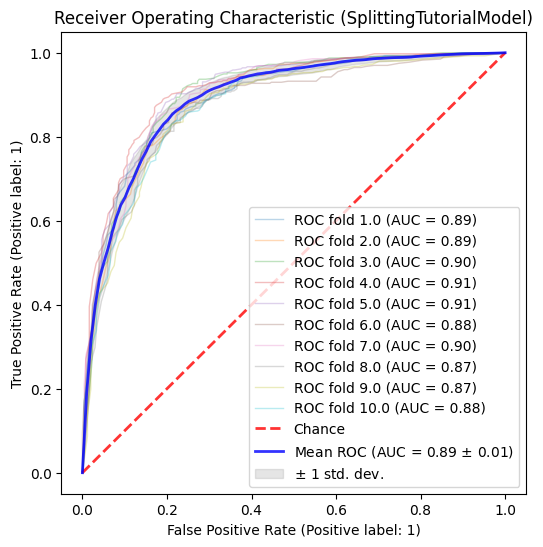

[<Figure size 600x600 with 1 Axes>]

<Figure size 640x480 with 0 Axes>

In [14]:
# plot the results for bootstrapping
from qsprpred.plotting.classification import ROCPlot

plot = ROCPlot([model])
plot.make(save=True, show=True, property_name="pchembl_value_Mean_class", validation="cv")

c:\Users\helle\anaconda3\envs\qsprpred\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\helle\anaconda3\envs\qsprpred\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


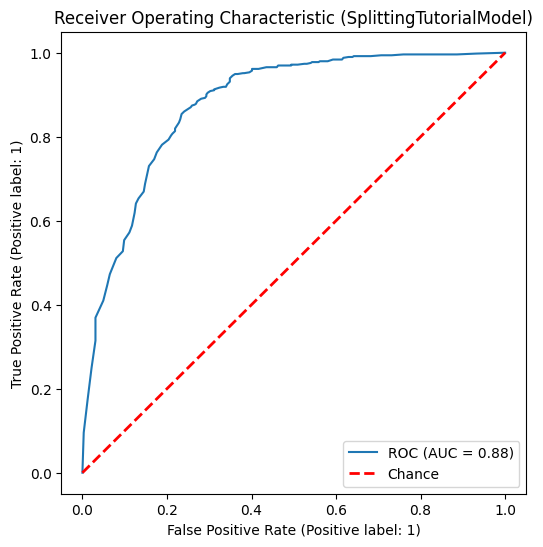

[<Figure size 600x600 with 1 Axes>]

<Figure size 640x480 with 0 Axes>

In [15]:
# plot test set results
plot.make(save=True, show=True, property_name="pchembl_value_Mean_class", validation="ind")

We can now also easily run a different analysis if desired. This time we use the `ScaffoldSplit` to perform cross-validation:

In [ ]:
CrossValAssessor(scoring=score_func, split=ScaffoldSplit(n_folds=10, scaffold=Murcko()))(model)

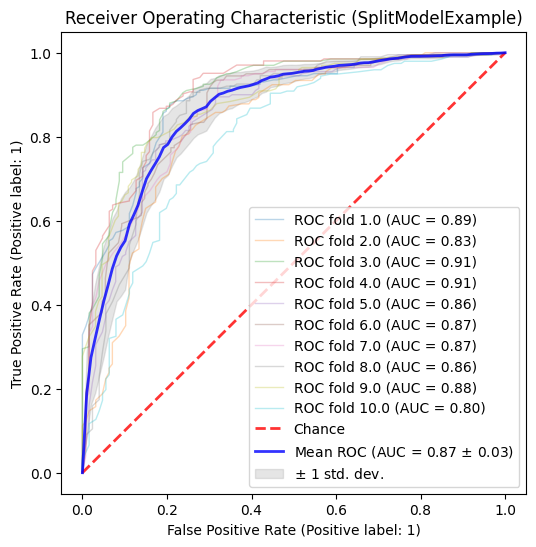

[<Figure size 600x600 with 1 Axes>]

<Figure size 640x480 with 0 Axes>

In [18]:
plot.make(save=True, show=True, property_name="pchembl_value_Mean_class", validation="cv")

Evaluating different time splits can also be convenient sometimes:

<Axes: >

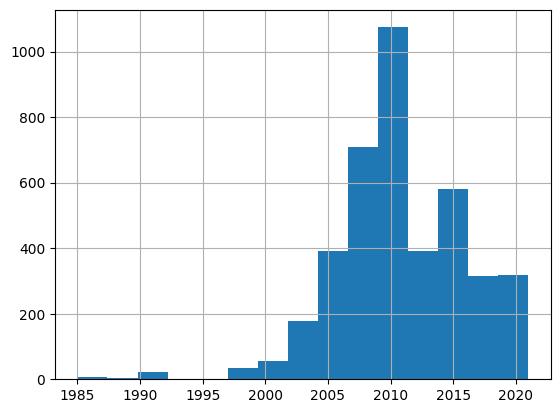

In [6]:
dataset.getProperty("Year").hist(bins=15)

In [20]:
from qsprpred.data.utils.datasplitters import TemporalSplit

CrossValAssessor(scoring=score_func, split=TemporalSplit(timesplit=[2000, 2010, 2020], timeprop="Year"))(model)

[0.6664705661776654, 0.7195686213396263, 0.9438775510204083]

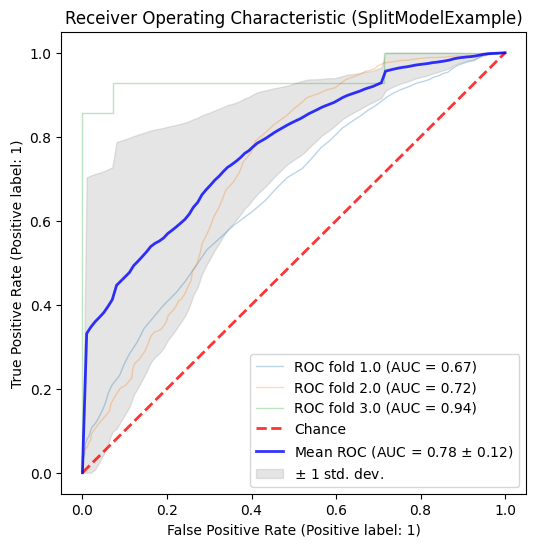

[<Figure size 600x600 with 1 Axes>]

<Figure size 640x480 with 0 Axes>

In [21]:
plot.make(save=True, show=True, property_name="pchembl_value_Mean_class", validation="cv")